In [1]:
from sys import path
import yaml
from langchain_core.messages import HumanMessage
from langgraph.checkpoint.memory import InMemorySaver

path.append("../src/")

from utils import format_messages
from subagents.research_agent import ResearchAgent

# compilation config
checkpointer = InMemorySaver()
compile_config = {'checkpointer': checkpointer}

# llm config
llm_config = yaml.safe_load(open("../config/llm.yaml", "rb"))

# app
app = ResearchAgent(
    llm_config=llm_config.get("research"),
    compile_config=compile_config
)

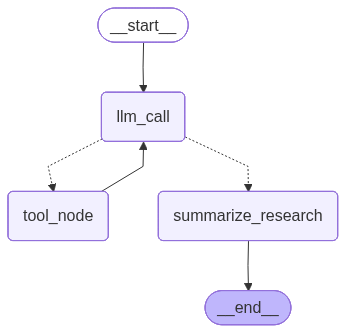

In [2]:
from IPython.display import Image, display

display(Image(app.compiled_graph.get_graph(xray=True).draw_mermaid_png()))

In [ ]:
# Run the agent
from utils import format_messages
from langchain_core.messages import HumanMessage

# Example brief
research_brief = """I want to identify and evaluate the coffee shops in San Francisco that are considered the best based specifically  
on coffee quality. My research should focus on analyzing and comparing coffee shops within the San Francisco area, 
using coffee quality as the primary criterion. I am open regarding methods of assessing coffee quality (e.g.,      
expert reviews, customer ratings, specialty coffee certifications), and there are no constraints on ambiance,      
location, wifi, or food options unless they directly impact perceived coffee quality. Please prioritize primary    
sources such as the official websites of coffee shops, reputable third-party coffee review organizations (like     
Coffee Review or Specialty Coffee Association), and prominent review aggregators like Google or Yelp where direct  
customer feedback about coffee quality can be found. The study should result in a well-supported list or ranking of
the top coffee shops in San Francisco, emphasizing their coffee quality according to the latest available data as  
of July 2025."""

config = {"configurable": {"thread_id": "scoping-session-1"}}
result = await app.ainvoke(
    {"messages": [
        HumanMessage(content=f"{research_brief}.")
    ]},
    config=config
)
format_messages(result['messages'])

╭─────────────────────────────────────────────────── 🧑 Human ────────────────────────────────────────────────────╮
│ I want to identify and evaluate the coffee shops in San Francisco that are considered the best based            │
│ specifically                                                                                                    │
│ on coffee quality. My research should focus on analyzing and comparing coffee shops within the San Francisco    │
│ area,                                                                                                           │
│ using coffee quality as the primary criterion. I am open regarding methods of assessing coffee quality (e.g.,   │
│ expert reviews, customer ratings, specialty coffee certifications), and there are no constraints on ambiance,   │
│ location, wifi, or food options unless they directly impact perceived coffee quality. Please prioritize primary │
│ sources such as the official websites of coffee shops, reputable third-party coffee review organizations (like  │
│ Coffee Review or Specialty Coffee Association), and prominent review aggregators like Google or Yelp where      │
│ direct                                                                                                          │
│ customer feedback about coffee quality can be found. The study should result in a well-supported list or        │
│ ranking of                                                                                                      │
│ the top coffee shops in San Francisco, emphasizing their coffee quality according to the latest available data  │
│ as                                                                                                              │
│ of July 2025..                                                                                                  │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭───────────────────────────────────────────────────── 📝 AI ─────────────────────────────────────────────────────╮
│                                                                                                                 │
│                                                                                                                 │
│ 🔧 Tool Call: tavily_search                                                                                     │
│    Args: {                                                                                                      │
│   "query": "best coffee shops San Francisco coffee quality reviews 2025"                                        │
│ }                                                                                                               │
│    ID: call_x9zx418Sw1lkBRgKlweXRGfY                                                                            │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────── 🔧 Tool Output ─────────────────────────────────────────────────╮
│ Search results:                                                                                                 │
│                                                                                                                 │
│                                                                                                                 │
│                                                                                                                 │
│ --- SOURCE 1: The Best Coffee Shops in San Francisco in 2025 (Ranking) ---                                      │
│ URL: https://coffeewithdamian.com/blog/best-coffee-shops-in-san-francisco/                                      │
│                                                                                                                 │
│ SUMMARY:                                                                                                        │
│ <summary>                                                                                                       │
│ The article presents a ranking of the best coffee shops in San Francisco and its suburbs as of 2025, focusing   │
│ on subjective experiences based on various factors like prices, espresso, cappuccino, pastries, atmosphere, and │
│ music. The top-rated coffee shop is Saint Frank Coffee, located at 2340 Polk St, known for its friendly service │
│ and great ambiance, receiving an overall score of 8.0. The article encourages readers to explore the local      │
│ coffee scene and offers personal opinions on each establishment.                                                │
│ </summary>                                                                                                      │
│                                                                                                                 │
│ <key_excerpts>                                                                                                  │
│ Most importantly enjoy the journey of exploring the world of San Francisco Coffee Shops, stated the author.     │
│ Saint Frank Coffee was described as having amazing coffee and an ambiance that makes you want to spend the      │
│ entire day. Prices and ratings include Espresso: 8.5, Cappuccino: 8.5, and Almonde Croissant: 8.0.              │
│ </key_excerpts>                                                                                                 │
│                                                                                                                 │
│ --------------------------------------------------------------------------------                                │
│                                                                                                                 │
│                                                                                                                 │
│ --- SOURCE 2: Coffee Shops San Francisco, CA - Last Updated November 2025 ---                                   │
│ URL: https://www.yelp.com/search?find_desc=Coffee+Shops&find_loc=San+Francisco%2C+CA                            │
│                                                                                                                 │
│ SUMMARY:                                                                                                        │
│ 1. Q Specialty Coffee. 4.5 (64 reviews). 2.0 mi · 2. Third Wheel Coffee. 4.9 (58 reviews). 1.0 mi · 3. The      │
│ Coffee Movement. 4.6 (251 reviews). 2.5 mi · 4.                                                                 │
│                                                                                                                 │
│ --------------------------------------------------------------------------------                                │
│                                                        

╭───────────────────────────────────────────────────── 📝 AI ─────────────────────────────────────────────────────╮
│                                                                                                                 │
│                                                                                                                 │
│ 🔧 Tool Call: think_tool                                                                                        │
│    Args: {                                                                                                      │
│   "reflection": "I found several sources that provide insights into the best coffee shops in San Francisco as   │
│ of 2025, focusing on coffee quality. The first source ranks coffee shops based on subjective experiences, with  │
│ Saint Frank Coffee being highlighted for its excellent coffee and ambiance. The second source from Yelp lists   │
│ coffee shops with customer ratings, which can be useful for gauging coffee quality based on user feedback. The  │
│ third source offers a review of various coffee shops, emphasizing their unique offerings and coffee quality.    │
│ \n\nHowever, I need more specific evaluations of coffee quality, such as expert reviews or specialty coffee     │
│ certifications, to strengthen the analysis. I should look for sources that provide detailed assessments of      │
│ coffee quality, possibly from coffee review organizations or more in-depth customer reviews."                   │
│ }                                                                                                               │
│    ID: call_dA3mh5Cqxe394jONYujNaEKO                                                                            │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────── 🔧 Tool Output ─────────────────────────────────────────────────╮
│ Reflection recorded: I found several sources that provide insights into the best coffee shops in San Francisco  │
│ as of 2025, focusing on coffee quality. The first source ranks coffee shops based on subjective experiences,    │
│ with Saint Frank Coffee being highlighted for its excellent coffee and ambiance. The second source from Yelp    │
│ lists coffee shops with customer ratings, which can be useful for gauging coffee quality based on user          │
│ feedback. The third source offers a review of various coffee shops, emphasizing their unique offerings and      │
│ coffee quality.                                                                                                 │
│                                                                                                                 │
│ However, I need more specific evaluations of coffee quality, such as expert reviews or specialty coffee         │
│ certifications, to strengthen the analysis. I should look for sources that provide detailed assessments of      │
│ coffee quality, possibly from coffee review organizations or more in-depth customer reviews.                    │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭───────────────────────────────────────────────────── 📝 AI ─────────────────────────────────────────────────────╮
│                                                                                                                 │
│                                                                                                                 │
│ 🔧 Tool Call: tavily_search                                                                                     │
│    Args: {                                                                                                      │
│   "query": "coffee quality reviews San Francisco coffee shops expert reviews 2025"                              │
│ }                                                                                                               │
│    ID: call_6oz868SGAmVIa5nBQE7seRjl                                                                            │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────── 🔧 Tool Output ─────────────────────────────────────────────────╮
│ Search results:                                                                                                 │
│                                                                                                                 │
│                                                                                                                 │
│                                                                                                                 │
│ --- SOURCE 1: THE BEST Coffee & Tea in San Francisco - Tripadvisor ---                                          │
│ URL: https://www.tripadvisor.com/Restaurants-g60713-zfg9900-San_Francisco_California.html                       │
│                                                                                                                 │
│ SUMMARY:                                                                                                        │
│ Coffee & Tea in San Francisco ; 1. Cafe De Casa · (213 reviews) · Very good food. The acai bowl was amazing!    │
│ Good located, next to fishermans.                                                                               │
│                                                                                                                 │
│ --------------------------------------------------------------------------------                                │
│                                                                                                                 │
│                                                                                                                 │
│ --- SOURCE 2: The 50 best coffee shops and best cafes in San Francisco - Wanderlog ---                          │
│ URL: https://wanderlog.com/list/geoCategory/17872/best-coffee-shops-and-best-cafes-in-san-francisco             │
│                                                                                                                 │
│ SUMMARY:                                                                                                        │
│ <summary>                                                                                                       │
│ The webpage presents a curated list of the 50 best coffee shops and cafes in San Francisco, reflecting the      │
│ city's vibrant coffee culture. The list includes popular venues like Sightglass Coffee, Saint Frank Coffee, and │
│ Ritual Coffee Roasters, known for their unique offerings and atmospheres. Each cafe entry generally includes a  │
│ description of the ambiance, standout beverages, customer experiences, and price range. The webpage also        │
│ emphasizes that the recommendations are backed by thorough research, referencing numerous reputable sources.    │
│ Overall, the guide serves as a comprehensive resource for coffee enthusiasts and travelers alike looking to     │
│ explore the top coffee spots in San Francisco.                                                                  │
│ </summary>                                                                                                      │
│                                                                                                                 │
│ <key_excerpts>                                                                                                  │
│ We scoured the internet and read through 62 reputable sites and blogs, ensuring the best options for coffee     │
│ lovers. Sightglass Coffee prides itself on meticulously overseeing every step of the coffee-making process,     │
│ from sourcing to brewing. Customers appreciate the cozy ambiance and unique drinks like the iced brown butter   │
│ miso caramel latte.                                                                                             │
│ </key_excerpts>                                        

╭───────────────────────────────────────────────────── 📝 AI ─────────────────────────────────────────────────────╮
│                                                                                                                 │
│                                                                                                                 │
│ 🔧 Tool Call: think_tool                                                                                        │
│    Args: {                                                                                                      │
│   "reflection": "The second search yielded more valuable insights into coffee quality in San Francisco. The     │
│ second source from Wanderlog provides a curated list of the best coffee shops, emphasizing their unique         │
│ offerings and customer experiences, which can help assess coffee quality. Notably, it mentions Sightglass       │
│ Coffee, which is recognized for its meticulous coffee-making process, indicating a focus on quality. \n\nThe    │
│ first source from Tripadvisor is less relevant as it focuses more on food rather than coffee quality. The       │
│ Reddit source does not provide specific evaluations but indicates a community interest in coffee shops. \n\nI   │
│ still need more detailed expert reviews or certifications related to coffee quality to create a well-supported  │
│ list. I should search for specific coffee review organizations or articles that evaluate coffee quality in San  │
│ Francisco."                                                                                                     │
│ }                                                                                                               │
│    ID: call_wOthbcKsBiBpjJYDKdkqcT7M                                                                            │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────── 🔧 Tool Output ─────────────────────────────────────────────────╮
│ Reflection recorded: The second search yielded more valuable insights into coffee quality in San Francisco. The │
│ second source from Wanderlog provides a curated list of the best coffee shops, emphasizing their unique         │
│ offerings and customer experiences, which can help assess coffee quality. Notably, it mentions Sightglass       │
│ Coffee, which is recognized for its meticulous coffee-making process, indicating a focus on quality.            │
│                                                                                                                 │
│ The first source from Tripadvisor is less relevant as it focuses more on food rather than coffee quality. The   │
│ Reddit source does not provide specific evaluations but indicates a community interest in coffee shops.         │
│                                                                                                                 │
│ I still need more detailed expert reviews or certifications related to coffee quality to create a               │
│ well-supported list. I should search for specific coffee review organizations or articles that evaluate coffee  │
│ quality in San Francisco.                                                                                       │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭───────────────────────────────────────────────────── 📝 AI ─────────────────────────────────────────────────────╮
│                                                                                                                 │
│                                                                                                                 │
│ 🔧 Tool Call: tavily_search                                                                                     │
│    Args: {                                                                                                      │
│   "query": "specialty coffee certifications San Francisco coffee shops 2025"                                    │
│ }                                                                                                               │
│    ID: call_qwWoN7K1GTb0UUX2sjGyJz98                                                                            │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────── 🔧 Tool Output ─────────────────────────────────────────────────╮
│ Search results:                                                                                                 │
│                                                                                                                 │
│                                                                                                                 │
│                                                                                                                 │
│ --- SOURCE 1: Coffee Nerds and Matcha Stans Will Love This Pac Heights Cafe ---                                 │
│ URL: https://sf.eater.com/restaurant-news/208595/q-specialty-coffee-opening-pac-heights                         │
│                                                                                                                 │
│ SUMMARY:                                                                                                        │
│ <summary>                                                                                                       │
│ Q Specialty Coffee, opening in Pacific Heights on October 18, 2025, aims to enhance San Francisco's coffee      │
│ scene with a focus on unique, high-quality brews. Founded by Cyrus Shen, who previously launched Toast’N Egg,   │
│ this cafe features rotated seasonal pourovers and specialty drinks, including creative matcha options and nitro │
│ cold brews. Shen, certified in coffee grading, emphasizes the importance of quality and storytelling in coffee  │
│ preparation. Q Specialty Coffee also incorporates modern aesthetics and high-tech roasting processes,           │
│ encouraging customers to engage with the coffee-making experience. It will operate daily from 6 a.m. to 6 p.m.  │
│ </summary>                                                                                                      │
│                                                                                                                 │
│ <key_excerpts>                                                                                                  │
│ Q Specialty Coffee has the potential to become one of the top coffee destinations in the city, says Cyrus Shen. │
│ The menu is designed for specialty coffee enthusiasts and those following online trends. Customers can see and  │
│ smell the beans before they are roasted—this interaction is vital in enhancing their coffee experience.         │
│ </key_excerpts>                                                                                                 │
│                                                                                                                 │
│ --------------------------------------------------------------------------------                                │
│                                                                                                                 │
│                                                                                                                 │
│ --- SOURCE 2: The 51 Best Specialty Coffee Roasters and Brands in 2025 ---                                      │
│ URL:                                                                                                            │
│ https://coffeebros.com/blogs/coffee/the-51-best-specialty-coffee-roasters-and-brand-in-the-united-states-of-ame │
│ rica?srsltid=AfmBOooGM0a86Pxy_JtOk4sJCd_uj3gb59sC7coMnI7f_P-F_uzm32Yx                                           │
│                                                                                                                 │
│ SUMMARY:                                                                                                        │
│ <summary>                                                                                                       │
│ The webpage from Coffee Bros. outlines the best special

╭───────────────────────────────────────────────────── 📝 AI ─────────────────────────────────────────────────────╮
│                                                                                                                 │
│                                                                                                                 │
│ 🔧 Tool Call: think_tool                                                                                        │
│    Args: {                                                                                                      │
│   "reflection": "The third search provided valuable insights into specialty coffee certifications and quality   │
│ indicators. The first source discusses Q Specialty Coffee, which emphasizes high-quality brews and is founded   │
│ by a certified coffee grader, indicating a focus on coffee quality. This could be a significant addition to the │
│ list of top coffee shops. \n\nThe second source from Coffee Bros. lists the best specialty coffee roasters,     │
│ emphasizing quality and sustainability, which can help identify reputable coffee shops in San Francisco that    │
│ source from these roasters. The third source, the Specialty Coffee Association, is a key organization in the    │
│ coffee industry, providing certifications and educational programs that enhance coffee quality. \n\nI now have  │
│ a good mix of customer reviews, expert evaluations, and specialty coffee certifications. I should compile this  │
│ information to create a well-supported list of the best coffee shops in San Francisco based on coffee quality." │
│ }                                                                                                               │
│    ID: call_NHdc6SAM5hWbyGVAGN9Ix35W                                                                            │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────── 🔧 Tool Output ─────────────────────────────────────────────────╮
│ Reflection recorded: The third search provided valuable insights into specialty coffee certifications and       │
│ quality indicators. The first source discusses Q Specialty Coffee, which emphasizes high-quality brews and is   │
│ founded by a certified coffee grader, indicating a focus on coffee quality. This could be a significant         │
│ addition to the list of top coffee shops.                                                                       │
│                                                                                                                 │
│ The second source from Coffee Bros. lists the best specialty coffee roasters, emphasizing quality and           │
│ sustainability, which can help identify reputable coffee shops in San Francisco that source from these          │
│ roasters. The third source, the Specialty Coffee Association, is a key organization in the coffee industry,     │
│ providing certifications and educational programs that enhance coffee quality.                                  │
│                                                                                                                 │
│ I now have a good mix of customer reviews, expert evaluations, and specialty coffee certifications. I should    │
│ compile this information to create a well-supported list of the best coffee shops in San Francisco based on     │
│ coffee quality.                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭───────────────────────────────────────────────────── 📝 AI ─────────────────────────────────────────────────────╮
│ Based on the research conducted, here is a well-supported list of the top coffee shops in San Francisco,        │
│ emphasizing their coffee quality as of 2025:                                                                    │
│                                                                                                                 │
│ 1. **Saint Frank Coffee**                                                                                       │
│    - **Location**: 2340 Polk St                                                                                 │
│    - **Highlights**: Known for its exceptional coffee quality, Saint Frank Coffee has received high ratings for │
│ its espresso (8.5) and cappuccino (8.5). The ambiance is inviting, making it a favorite among locals.           │
│    - **Source**: [Coffee with Damian](https://coffeewithdamian.com/blog/best-coffee-shops-in-san-francisco/)    │
│                                                                                                                 │
│ 2. **Sightglass Coffee**                                                                                        │
│    - **Location**: Multiple locations in San Francisco                                                          │
│    - **Highlights**: Sightglass is recognized for its meticulous coffee-making process, from sourcing to        │
│ brewing. Customers appreciate unique drinks like the iced brown butter miso caramel latte, showcasing their     │
│ commitment to quality.                                                                                          │
│    - **Source**:                                                                                                │
│ [Wanderlog](https://wanderlog.com/list/geoCategory/17872/best-coffee-shops-and-best-cafes-in-san-francisco)     │
│                                                                                                                 │
│ 3. **Q Specialty Coffee**                                                                                       │
│    - **Location**: Opening in Pacific Heights on October 18, 2025                                               │
│    - **Highlights**: Founded by a certified coffee grader, Q Specialty Coffee focuses on high-quality brews and │
│ offers seasonal pourovers and specialty drinks. The café encourages customer engagement with the coffee-making  │
│ process.                                                                                                        │
│    - **Source**: [Eater SF](https://sf.eater.com/restaurant-news/208595/q-specialty-coffee-opening-pac-heights) │
│                                                                                                                 │
│ 4. **Ritual Coffee Roasters**                                                                                   │
│    - **Location**: Multiple locations in San Francisco                                                          │
│    - **Highlights**: Ritual is known for its direct trade practices and high-quality beans. They emphasize      │
│ sustainability and quality in their coffee offerings, making them a staple in the San Francisco coffee scene.   │
│    - **Source**:                                                                                                │
│ [Wanderlog](https://wanderlog.com/list/geoCategory/17872/best-coffee-shops-and-best-cafes-in-san-francisco)     │
│                                                                                                                 │
│ 5. **Cumaica Coffee**                                                                                           │
│    - **Location**: 1001 Market St                                                                               │
│    - **Highlights**: Cumaica Coffee is celebrated for i